# Democracy Unveiled: Tackling Corruption

### Yunus Kocabey

## Introduction

In contemporary global discourse, the relationship between the level of democracy within a nation and its propensity for corruption has become a subject of profound interest and scrutiny. The World Democracy Index, a metric often utilized to gauge the extent of a country's democratic practices, provides a nuanced evaluation of the degree of political freedom and civil liberties present within a nation's governance structure. Simultaneously, the Corruption Perceptions Index serves as a vital tool in assessing the perceived levels of corruption within different countries, thereby offering insights into the effectiveness of their anti-corruption measures and the overall integrity of their institutions.
***
This study undertakes a rigorous analysis using the Difference in Differences (DID) approach to unravel the intricate dynamics between the World Democracy Index and the Corruption Perceptions Index. The World Democracy Index, higher values of which signify a less authoritarian political environment, is employed as a proxy for measuring the degree of democracy in various countries. Conversely, the Corruption Perceptions Index, with higher scores indicating lower levels of corruption, functions as an indicator of the prevalence and scale of corruption within these nations.
***
Our primary objective is to elucidate the relationship between the progression of democratic values over time and the corresponding changes in the levels of corruption across a diverse set of countries. Through the implementation of a DID analysis, we aim to discern whether an increase in a country's democratic framework is associated with a concurrent reduction in corruption levels. To achieve this, we divided our sample into distinct control and treatment groups, with the former comprising countries that exhibited marginal or negligible alterations in their democracy indices from 2000 to 2020, and the latter consisting of nations that experienced substantial improvements in their democracy indices, reflecting a notable shift toward reduced authoritarianism.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) plays a critical role in comprehensively understanding the structure and characteristics of the datasets under investigation. In this study, the EDA process was initiated by importing essential libraries such as pandas, numpy, matplotlib, as well as necessary modules from sklearn and statsmodels. The datasets were loaded using the 'pd.read_csv' function, incorporating the Corruption Perceptions Index (CPI) data for the years 2000 and 2020, along with the World Democracy Index data. 
***
The dimensions of each dataset were inspected using the 'shape' attribute, revealing the number of rows and columns in the respective dataframes. Furthermore, the 'head' function was employed to provide a preliminary glimpse of the first few rows of each dataset, offering an initial understanding of the structure and content of the data. By leveraging the 'info' method, an overview of the data types and the presence of missing values within the datasets was obtained, enabling a comprehensive assessment of the data quality and integrity. Additionally, the 'sort_values' function was utilized to identify the top entries in the datasets, showcasing the countries with the highest corruption scores for the years 2000 and 2020.
***
These initial data exploration steps have set the foundation for a more in-depth analysis, enabling the identification of patterns and trends that may further inform the subsequent statistical investigation.

In [1]:
# importing necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the datasets using 'pd.read_csv'
cor_raw_2000 = pd.read_csv('Data/CPI-2000_200603_083012.csv')
cor_raw_2020 = pd.read_csv('Data/CPI2020_GlobalTablesTS_210125.csv')
dem_raw = pd.read_csv('Data/Dem_data.csv')

In [3]:
# utilization of 'shape' for a quick understanding of the size the datasets
print("Corruption data (2000):", cor_raw_2000.shape)
print("Corruption data (2020):", cor_raw_2020.shape)
print("Democracy data (2020):", dem_raw.shape)

Corruption data (2000): (90, 6)
Corruption data (2020): (180, 22)
Democracy data (2020): (188, 134)


In [4]:
# implementing the 'head' function
cor_raw_2000.head()

,country,iso,region,score,rank,interval
0,Angola,AGO,SSA,1.7,85,1.6 - 2.5
1,Argentina,ARG,AME,3.5,52,3.0 - 4.5
2,Armenia,ARM,ECA,2.5,76,2.4 - 3.5
3,Australia,AUS,AP,8.3,13,6.7 - 9.3
4,Austria,AUT,WE/EU,7.7,15,6.2 - 8.5


In [5]:
cor_raw_2020.head()

,Country,ISO3,Region,CPI score 2020,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,88,1,1.78,8,85.09,90.91,NaN,...,90.0,NaN,83,94.0,NaN,98.0,78.0,NaN,79.0,86.0
1,New Zealand,NZL,AP,88,1,1.48,8,85.57,90.43,NaN,...,90.0,NaN,83,92.0,NaN,93.0,77.0,NaN,89.0,82.0
2,Finland,FIN,WE/EU,85,3,1.75,8,82.13,87.87,NaN,...,72.0,NaN,83,91.0,NaN,93.0,77.0,NaN,93.0,86.0
3,Singapore,SGP,AP,85,3,1.20,9,83.03,86.97,NaN,...,90.0,NaN,83,91.0,90.0,85.0,77.0,NaN,89.0,85.0
4,Sweden,SWE,WE/EU,85,3,1.30,8,82.86,87.14,NaN,...,90.0,NaN,83,84.0,NaN,93.0,77.0,NaN,77.0,87.0


In [6]:
dem_raw.head()

,Unnamed: 0,Code,EIU20VA,EIU20PV,EIU20GE,EIU20RQ,EIU20RL,EIU20CC,EIU19VA,EIU19PV,...,EIU98GE,EIU98RQ,EIU98RL,EIU98CC,EIU96VA,EIU96PV,EIU96GE,EIU96RQ,EIU96RL,EIU96CC
0,,Year,2020.000,2020,2020,2020,2020,2020,2019.000,2019,...,1998.0,1998.0,1998.000,1998.0,1996.000,1996.00,1996.0,1996.0,1996.000,1996.0
1,Aruba,ABW,0.813,0.750,0.625,0.700,0.844,0.750,0.813,0.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,0.174,0.100,0.000,0.200,0.094,0.000,0.174,0.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,AGO,0.339,0.600,0.125,0.400,0.281,0.000,0.342,0.600,...,0.0,0.2,0.063,0.0,0.063,0.15,0.0,0.2,0.063,0.0
4,Albania,ALB,0.554,0.600,0.250,0.650,0.406,0.250,0.576,0.550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# employing the 'info' method
# the code gains insights into the data types and potential missing values
cor_raw_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   90 non-null     object 
 1   iso       90 non-null     object 
 2   region    90 non-null     object 
 3   score     90 non-null     float64
 4   rank      90 non-null     int64  
 5   interval  90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


### Bar Plot

The bar plot depicts the Corruption Perceptions Index (CPI) scores across the top 30 countries, based on the dataset under analysis. The Corruption Perceptions Index serves as a key metric in assessing the perceived levels of corruption within various nations, with higher scores indicative of lower levels of corruption. The graph showcases the leading countries with the most favorable CPI scores, indicating a strong public perception of ethical governance and robust anti-corruption measures within these nations. Topping the list are countries renowned for their transparent and accountable political systems, exemplifying their commitment to upholding integrity and combating corrupt practices. The graph not only highlights the relative rankings of these nations in terms of their CPI scores but also underscores the notable efforts undertaken by these countries to foster an environment conducive to transparency and ethical conduct in governance and public administration.

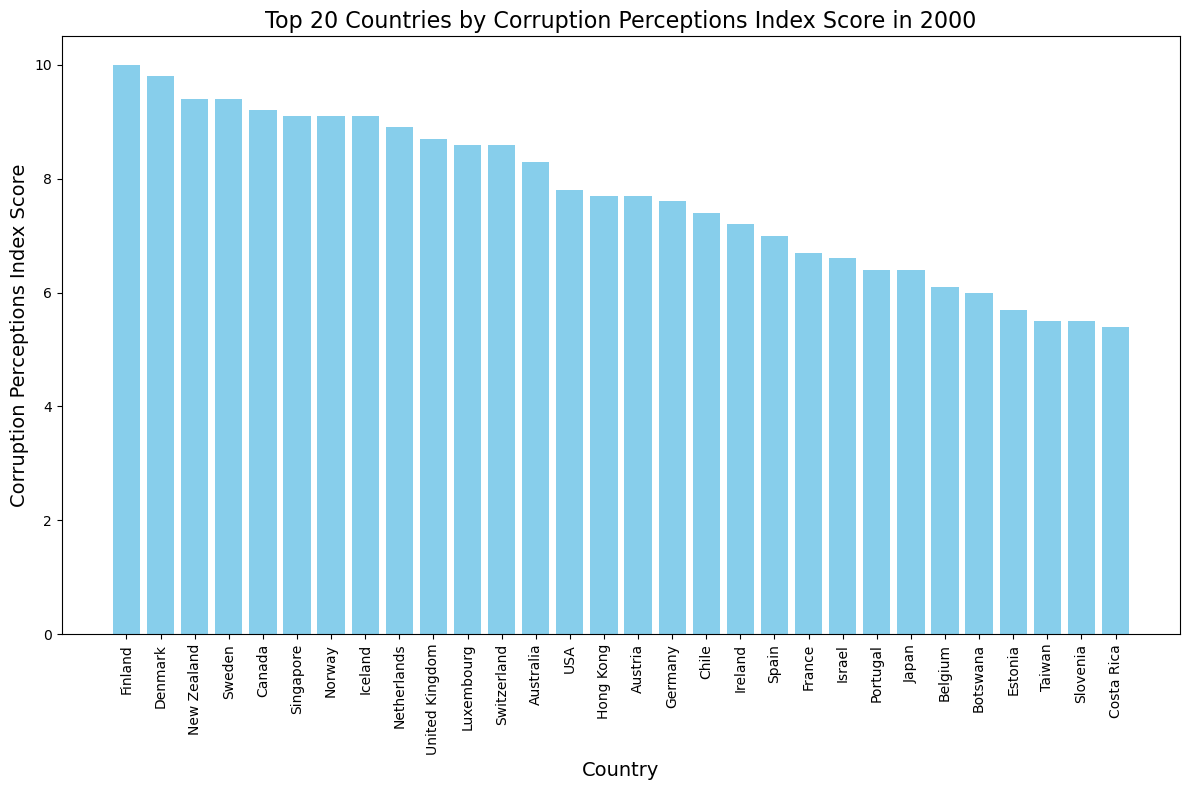

In [8]:
df = cor_raw_2000

# Replace the sample data with the actual data from your DataFrame
data = {
    'country': df['country'],
    'score': df['score']
}
# Sorting the DataFrame by 'score' and selecting the top 30 countries
df = pd.DataFrame(data)
df = df.sort_values('score', ascending=False).head(30)

# Creating a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(df['country'], df['score'], color='skyblue')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Corruption Perceptions Index Score', fontsize=14)
plt.title('Top 20 Countries by Corruption Perceptions Index Score in 2000', fontsize=16)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [9]:
cor_raw_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              180 non-null    object 
 1   ISO3                                                 180 non-null    object 
 2   Region                                               180 non-null    object 
 3   CPI score 2020                                       180 non-null    int64  
 4   Rank                                                 180 non-null    int64  
 5   Standard error                                       180 non-null    float64
 6   Number of sources                                    180 non-null    int64  
 7   Lower CI                                             180 non-null    float64
 8   Upper CI                                             180 non-null    f

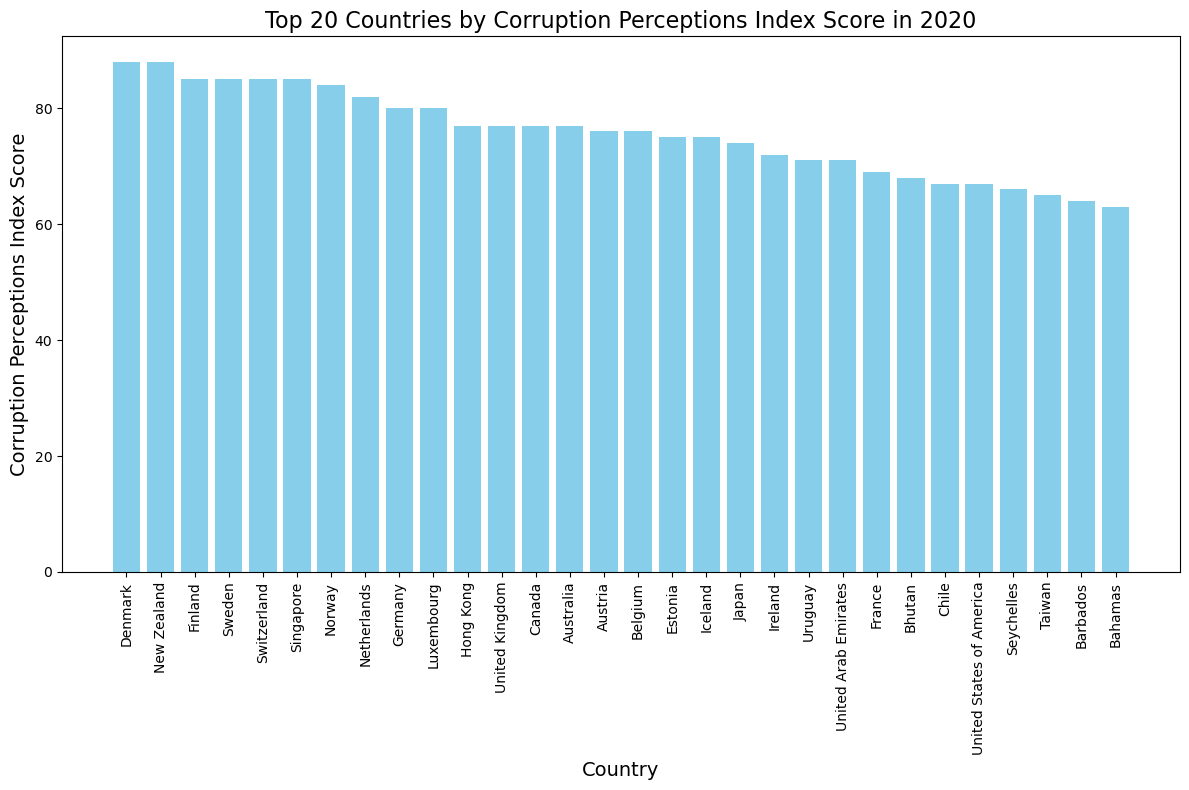

In [10]:
df = cor_raw_2020

# Replace the sample data with the actual data from your DataFrame
data = {
    'country': df['Country'],
    'score': df['CPI score 2020']
}
# Sorting the DataFrame by 'score' and selecting the top 30 countries
df = pd.DataFrame(data)
df = df.sort_values('score', ascending=False).head(30)

# Creating a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(df['country'], df['score'], color='skyblue')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Corruption Perceptions Index Score', fontsize=14)
plt.title('Top 20 Countries by Corruption Perceptions Index Score in 2020', fontsize=16)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [11]:
# 'sort_values' helps identify the countries with the highest corruption scores
cor_raw_2000.sort_values(by='score', ascending=False).head()

,country,iso,region,score,rank,interval
28,Finland,FIN,WE/EU,10.0,1,9.0 - 10.4
22,Denmark,DNK,WE/EU,9.8,2,8.6 - 10.6
57,New Zealand,NZL,AP,9.4,3,8.1 - 10.2
73,Sweden,SWE,WE/EU,9.4,3,8.1 - 9.9
14,Canada,CAN,AME,9.2,5,8.1 - 9.9


In [12]:
cor_raw_2020.sort_values(by='CPI score 2020', ascending=False).head()

,Country,ISO3,Region,CPI score 2020,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,88,1,1.78,8,85.09,90.91,NaN,...,90.0,NaN,83,94.0,NaN,98.0,78.0,NaN,79.0,86.0
1,New Zealand,NZL,AP,88,1,1.48,8,85.57,90.43,NaN,...,90.0,NaN,83,92.0,NaN,93.0,77.0,NaN,89.0,82.0
2,Finland,FIN,WE/EU,85,3,1.75,8,82.13,87.87,NaN,...,72.0,NaN,83,91.0,NaN,93.0,77.0,NaN,93.0,86.0
4,Sweden,SWE,WE/EU,85,3,1.30,8,82.86,87.14,NaN,...,90.0,NaN,83,84.0,NaN,93.0,77.0,NaN,77.0,87.0
5,Switzerland,CHE,WE/EU,85,3,1.10,7,83.20,86.80,NaN,...,90.0,NaN,83,87.0,NaN,85.0,77.0,NaN,83.0,NaN


## Data Cleaning

Data cleaning is a crucial step in preparing the dataset for analysis, ensuring data consistency and accuracy. The cleaning process involves handling missing values, standardizing data formats, and renaming columns for improved clarity and uniformity. Additionally, data cleaning often includes dropping irrelevant or redundant columns and merging datasets based on common identifiers, facilitating comprehensive analyses.

In [13]:
# extracting specific column
cor_2020 = cor_raw_2020[['Country', 'ISO3', 'Region', 'CPI score 2020']]
cor_2020.head()

,Country,ISO3,Region,CPI score 2020
0,Denmark,DNK,WE/EU,88
1,New Zealand,NZL,AP,88
2,Finland,FIN,WE/EU,85
3,Singapore,SGP,AP,85
4,Sweden,SWE,WE/EU,85


In [14]:
# removing the columns 'interval' and 'rank' 
cor_2000 = cor_raw_2000.drop(['interval', 'rank'], axis=1)
cor_2000.head()

,country,iso,region,score
0,Angola,AGO,SSA,1.7
1,Argentina,ARG,AME,3.5
2,Armenia,ARM,ECA,2.5
3,Australia,AUS,AP,8.3
4,Austria,AUT,WE/EU,7.7


In [15]:
cor_2000.sort_values(by='score', ascending=False).head(3)

,country,iso,region,score
28,Finland,FIN,WE/EU,10.0
22,Denmark,DNK,WE/EU,9.8
57,New Zealand,NZL,AP,9.4


In [16]:
cor_2020.sort_values(by='CPI score 2020', ascending=False).head(3)

,Country,ISO3,Region,CPI score 2020
0,Denmark,DNK,WE/EU,88
1,New Zealand,NZL,AP,88
2,Finland,FIN,WE/EU,85


### Normalization (Min-Max Scaling)

This method rescales the data to a specific range (often 0 to 1). It's achieved by subtracting the minimum value and then dividing by the range (maximum value minus minimum value).
***
The formula for Min-Max Scaling is given by:

$$
  X_{norm} = \frac{X - X_{min}}{X_{max}- X_{min}}\
$$

In [17]:
max_2000 = cor_2000['score'].max()
print("2000 max:", max_2000)
min_2000 = cor_2000['score'].min()
print("2000 max:", min_2000)

max_2020 = cor_2020['CPI score 2020'].max()
print("2020 max:", max_2020)
min_2020 = cor_2020['CPI score 2020'].min()
print("2020 max:", min_2020)

2000 max: 10.0
2000 max: 1.2
2020 max: 88
2020 max: 12


We apply the formula to the datasets.

In [18]:
cor_2000['score'] = (cor_2000['score'] - min_2000) / (max_2000 - min_2000)
cor_2020['CPI score 2020'] = (cor_2020['CPI score 2020'] - min_2020) / (max_2020 - min_2020)

Checking if we have done it correctly:

In [19]:
print("Norm 2000 max:", cor_2000['score'].max())
print("Norm 2000 min:", cor_2000['score'].min())
print("Norm 2020 max:", cor_2020['CPI score 2020'].max())
print("Norm 2020 min:", cor_2020['CPI score 2020'].min())

Norm 2000 max: 1.0
Norm 2000 min: 0.0
Norm 2020 max: 1.0
Norm 2020 min: 0.0


### Merging

Merging, also known as joining, is a fundamental operation in data manipulation that involves combining datasets based on common columns or indices. It allows you to bring together information from different data sources into a single unified dataset for comprehensive analysis. Merging is particularly useful when dealing with data spread across multiple tables or datasets, enabling the consolidation of related information and the creation of a more comprehensive and informative dataset.
***
In the provided context, merging has been used to combine two datasets, 'cor' and 'dem', based on the shared columns 'country' and 'iso'. This operation allows the integration of the Corruption Perceptions Index (CPI) scores and the Democracy scores for the years 2000 and 2020, respectively, into a unified dataset called 'data'. 

In [20]:
# renaming columns for merging
cor_2020.rename(columns={'Country': 'country', 'ISO3': 'iso',
                         'Region': 'region', 'CPI score 2020': 'score_2020'},
                inplace=True)
cor_2020.head()

,country,iso,region,score_2020
0,Denmark,DNK,WE/EU,1.000000
1,New Zealand,NZL,AP,1.000000
2,Finland,FIN,WE/EU,0.960526
3,Singapore,SGP,AP,0.960526
4,Sweden,SWE,WE/EU,0.960526


In [21]:
cor_2000.rename(columns={'score': 'score_2000'}, inplace=True)
cor_2000.head()

,country,iso,region,score_2000
0,Angola,AGO,SSA,0.056818
1,Argentina,ARG,AME,0.261364
2,Armenia,ARM,ECA,0.147727
3,Australia,AUS,AP,0.806818
4,Austria,AUT,WE/EU,0.738636


Merging the cor datasets:

In [22]:
cor = pd.merge(cor_2000, cor_2020, on=["country", "iso", "region"])

Preparing the dem dataset:

In [23]:
dem_raw.head()

,Unnamed: 0,Code,EIU20VA,EIU20PV,EIU20GE,EIU20RQ,EIU20RL,EIU20CC,EIU19VA,EIU19PV,...,EIU98GE,EIU98RQ,EIU98RL,EIU98CC,EIU96VA,EIU96PV,EIU96GE,EIU96RQ,EIU96RL,EIU96CC
0,,Year,2020.000,2020,2020,2020,2020,2020,2019.000,2019,...,1998.0,1998.0,1998.000,1998.0,1996.000,1996.00,1996.0,1996.0,1996.000,1996.0
1,Aruba,ABW,0.813,0.750,0.625,0.700,0.844,0.750,0.813,0.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,0.174,0.100,0.000,0.200,0.094,0.000,0.174,0.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,AGO,0.339,0.600,0.125,0.400,0.281,0.000,0.342,0.600,...,0.0,0.2,0.063,0.0,0.063,0.15,0.0,0.2,0.063,0.0
4,Albania,ALB,0.554,0.600,0.250,0.650,0.406,0.250,0.576,0.550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# original value in that specific cell is overwritten with '2020'
dem_raw.at['0', 'EIU20VA'] = '2020'

In [25]:
dem_raw.columns

Index(['Unnamed: 0', 'Code', 'EIU20VA', 'EIU20PV', 'EIU20GE', 'EIU20RQ',
       'EIU20RL', 'EIU20CC', 'EIU19VA', 'EIU19PV',
       ...
       'EIU98GE', 'EIU98RQ', 'EIU98RL', 'EIU98CC', 'EIU96VA', 'EIU96PV',
       'EIU96GE', 'EIU96RQ', 'EIU96RL', 'EIU96CC'],
      dtype='object', length=134)

In [26]:
dem_df = dem_raw[['Unnamed: 0', 'Code', 'EIU20VA', 'EIU20PV', 'EIU20GE', 'EIU20RQ', \
                 'EIU20RL', 'EIU20CC','EIU00VA', 'EIU00PV', 'EIU00GE', 'EIU00RQ', \
                 'EIU00RL', 'EIU00CC']]
dem_df.head()

,Unnamed: 0,Code,EIU20VA,EIU20PV,EIU20GE,EIU20RQ,EIU20RL,EIU20CC,EIU00VA,EIU00PV,EIU00GE,EIU00RQ,EIU00RL,EIU00CC
0,,Year,2020.0,2020,2020,2020,2020,2020,2000.000,2000.00,2000.0,2000.0,2000.000,2000.0
1,Aruba,ABW,0.813,0.750,0.625,0.700,0.844,0.750,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,0.174,0.100,0.000,0.200,0.094,0.000,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,AGO,0.339,0.600,0.125,0.400,0.281,0.000,0.063,0.15,0.0,0.2,0.063,0.0
4,Albania,ALB,0.554,0.600,0.250,0.650,0.406,0.250,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
dem_df.drop([0], axis=0, inplace=True)
dem_df = dem_df.reset_index()
dem_df.drop('index', axis=1, inplace=True)

In [28]:
dem_df.head()

,Unnamed: 0,Code,EIU20VA,EIU20PV,EIU20GE,EIU20RQ,EIU20RL,EIU20CC,EIU00VA,EIU00PV,EIU00GE,EIU00RQ,EIU00RL,EIU00CC
0,Aruba,ABW,0.813,0.750,0.625,0.700,0.844,0.750,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,0.174,0.100,0.000,0.200,0.094,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,0.339,0.600,0.125,0.400,0.281,0.000,0.063,0.15,0.0,0.20,0.063,0.00
3,Albania,ALB,0.554,0.600,0.250,0.650,0.406,0.250,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,ARE,0.188,0.800,0.750,0.700,0.719,0.750,0.250,0.75,0.5,0.75,0.563,0.25


In [29]:
dem_df.rename(columns={'Unnamed: 0': 'country'}, inplace=True)

In [30]:
dem_df.dropna(inplace=True)

In [31]:
dem_df[['EIU20VA', 'EIU20PV', 'EIU20GE', 
        'EIU20RQ', 'EIU20RL', 'EIU20CC']] = dem_df[['EIU20VA', 'EIU20PV', 'EIU20GE',
                                                    'EIU20RQ', 'EIU20RL', 'EIU20CC']].astype(float)
# making sure we have the right data types
dem_df.dtypes

country     object
Code        object
EIU20VA    float64
EIU20PV    float64
EIU20GE    float64
EIU20RQ    float64
EIU20RL    float64
EIU20CC    float64
EIU00VA    float64
EIU00PV    float64
EIU00GE    float64
EIU00RQ    float64
EIU00RL    float64
EIU00CC    float64
dtype: object

We need to calculate an average for democracy index from 6 categories in the dataset.

In [32]:
dem_df['dem_score_2020'] = (dem_df['EIU20VA'] + dem_df['EIU20PV'] + dem_df['EIU20GE'] + dem_df['EIU20RQ'] + dem_df['EIU20RL'] + dem_df['EIU20CC']) / 6

In [33]:
dem_df['dem_score_2000'] = (dem_df['EIU00VA'] + dem_df['EIU00PV'] + dem_df['EIU00GE'] + dem_df['EIU00RQ'] + dem_df['EIU00RL'] + dem_df['EIU00CC']) / 6

In [34]:
dem = dem_df.drop(['EIU20VA', 'EIU20PV', 'EIU20GE', 'EIU20RQ', \
     'EIU20RL', 'EIU20CC','EIU00VA', 'EIU00PV', 'EIU00GE', 'EIU00RQ', \
     'EIU00RL', 'EIU00CC'], axis=1)

In [35]:
dem.rename(columns={'Code': 'iso'}, inplace=True)

In [36]:
dem.head(2)

,country,iso,dem_score_2020,dem_score_2000
2,Angola,AGO,0.290833,0.079333
4,United Arab Emirates,ARE,0.651167,0.510500


In [37]:
cor.head(2)

,country,iso,region,score_2000,score_2020
0,Angola,AGO,SSA,0.056818,0.197368
1,Argentina,ARG,AME,0.261364,0.394737


We rename the columns properly so that we can merge the 'dem' with 'cor'.

In [38]:
cor.rename(columns={'score_2000': 'cor_score_2000', 'score_2020': 'cor_score_2020'}, inplace=True)

In [39]:
cor.head(2)

,country,iso,region,cor_score_2000,cor_score_2020
0,Angola,AGO,SSA,0.056818,0.197368
1,Argentina,ARG,AME,0.261364,0.394737


In [40]:
dem = dem[['country', 'iso', 'dem_score_2000', 'dem_score_2020']]

In [41]:
dem = dem.reset_index().drop('index', axis=1)

Here we are creating the general dataframe that has all the data.

In [42]:
data = pd.merge(cor, dem, on=["country", "iso"])

In [43]:
data.head(2)

,country,iso,region,cor_score_2000,cor_score_2020,dem_score_2000,dem_score_2020
0,Angola,AGO,SSA,0.056818,0.197368,0.079333,0.290833
1,Argentina,ARG,AME,0.261364,0.394737,0.448000,0.482000


In [44]:
# assigning the proper data types
data.cor_score_2020 = data.cor_score_2020.astype(float)
data.dtypes

country            object
iso                object
region             object
cor_score_2000    float64
cor_score_2020    float64
dem_score_2000    float64
dem_score_2020    float64
dtype: object

### Scatterplot

Certainly, here is a proper paragraph explaining a scatter plot and the provided code snippet:

A scatter plot is a fundamental visualization technique used to display the relationship or association between two numerical variables. It typically represents data points as individual dots, where each dot corresponds to a specific value pair from the two variables. Scatter plots are valuable for identifying patterns, trends, and correlations between the variables, aiding in the exploration of potential relationships within the data.

In the code below, the `plt.plot` function is utilized to generate a scatter plot for the variables 'cor_score_2020' and 'dem_score_2020' from the 'data' DataFrame. The 'cor_score_2020' values are plotted on the x-axis, while the 'dem_score_2020' values are plotted on the y-axis. The parameter `linestyle='none'` ensures that the data points are not connected by lines. The `marker` parameter is set to 'o', representing circular markers for each data point. Additionally, the `markerfacecolor` is set to 'skyblue', and the `markeredgecolor` is set to "black" to define the marker appearance. The `markersize` parameter is set to 8, determining the size of the markers in the scatter plot. Lastly, `plt.show()` is used to display the resulting scatter plot. This scatter plot visually depicts the relationship between the corruption scores and democracy scores for the year 2020, providing insights into any potential correlations or trends between these two variables within the dataset.

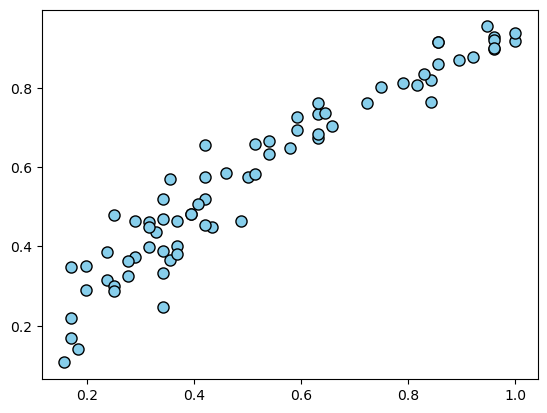

In [45]:
plt.plot('cor_score_2020', 'dem_score_2020', data=data, linestyle='none', \
        markerfacecolor='skyblue', marker="o", markeredgecolor="black", markersize=8)
plt.show()

We specify certain countries in the scatterplot.

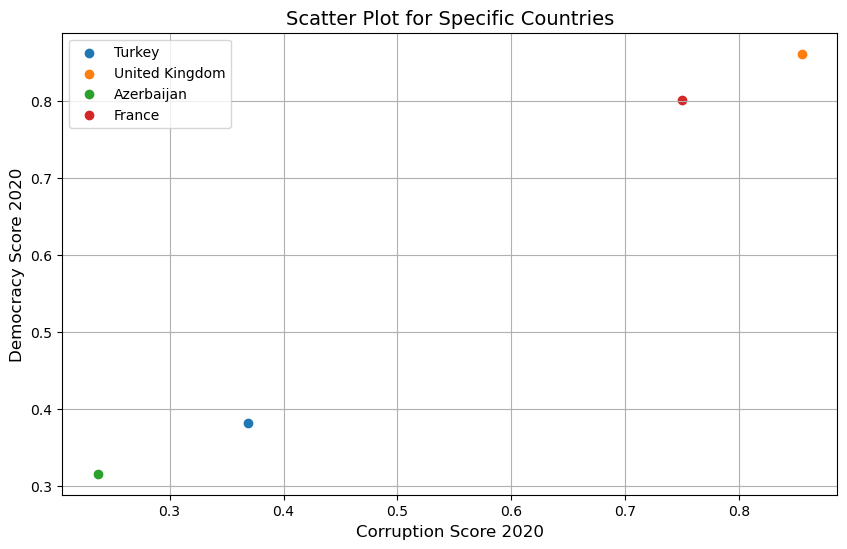

In [46]:
df = data

# Creating a scatter plot
plt.figure(figsize=(10, 6))
countries = ['Turkey', 'United Kingdom', 'Azerbaijan', 'France']
for country in countries:
    plt.scatter(df[df['country'] == country]['cor_score_2020'], df[df['country'] == country]['dem_score_2020'], label=country)

plt.xlabel('Corruption Score 2020', fontsize=12)
plt.ylabel('Democracy Score 2020', fontsize=12)
plt.title('Scatter Plot for Specific Countries', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

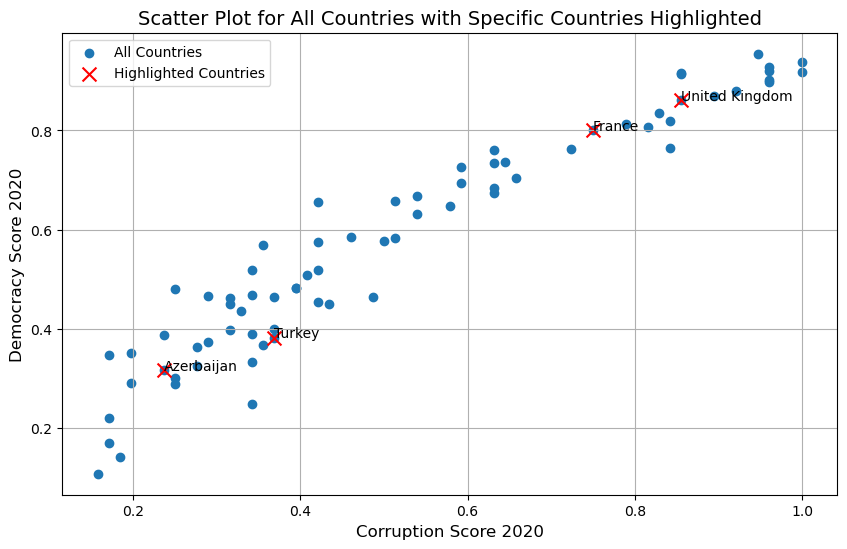

In [47]:
df = data

all_countries = df[['country', 'cor_score_2020', 'dem_score_2020']]

# Creating a scatter plot for all countries
plt.figure(figsize=(10, 6))
plt.scatter(all_countries['cor_score_2020'], all_countries['dem_score_2020'], label='All Countries')

# Highlighting specific countries
highlight_countries = ['Turkey', 'United Kingdom', 'Azerbaijan', 'France']
highlight_data = all_countries[all_countries['country'].isin(highlight_countries)]
for i, txt in enumerate(highlight_data['country']):
    plt.annotate(txt, (highlight_data['cor_score_2020'].iloc[i], highlight_data['dem_score_2020'].iloc[i]))

plt.scatter(highlight_data['cor_score_2020'], highlight_data['dem_score_2020'], label='Highlighted Countries', marker='x', color='red', s=100)

plt.xlabel('Corruption Score 2020', fontsize=12)
plt.ylabel('Democracy Score 2020', fontsize=12)
plt.title('Scatter Plot for All Countries with Specific Countries Highlighted', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


For 2000

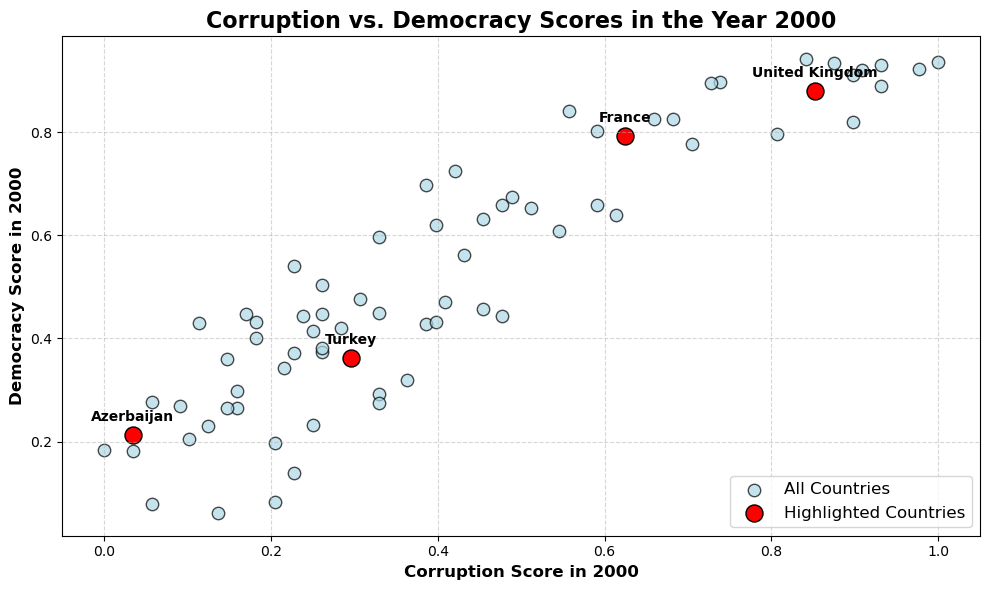

In [48]:
df_2000 = data

all_countries_2000 = df_2000[['country', 'cor_score_2000', 'dem_score_2000']]

# Creating a scatter plot for all countries
plt.figure(figsize=(10, 6))
plt.scatter(all_countries_2000['cor_score_2000'], all_countries_2000['dem_score_2000'], label='All Countries', color='lightblue', edgecolors='black', s=80, alpha=0.7)

# Highlighting specific countries
highlight_countries_2000 = ['Turkey', 'United Kingdom', 'Azerbaijan', 'France']
highlight_data_2000 = all_countries_2000[all_countries_2000['country'].isin(highlight_countries_2000)]
for i, txt in enumerate(highlight_data_2000['country']):
    plt.annotate(txt, (highlight_data_2000['cor_score_2000'].iloc[i], highlight_data_2000['dem_score_2000'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

plt.scatter(highlight_data_2000['cor_score_2000'], highlight_data_2000['dem_score_2000'], label='Highlighted Countries', marker='o', color='red', edgecolors='black', s=150)

plt.xlabel('Corruption Score in 2000', fontsize=12, fontweight='bold')
plt.ylabel('Democracy Score in 2000', fontsize=12, fontweight='bold')
plt.title('Corruption vs. Democracy Scores in the Year 2000', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Difference in Differences Analysis

Difference-in-Differences (DiD) analysis is a statistical technique used to estimate the causal effect of a treatment or intervention by comparing the changes in outcomes between a treatment group and a control group, both before and after the treatment. DiD is commonly applied in observational studies or quasi-experimental settings where randomized control trials are not feasible or ethical. It helps researchers evaluate the impact of a policy, program, or external factor on an outcome of interest.
***
In the project context, the DiD analysis has been employed to assess the relationship between changes in the Democracy Index and changes in the Corruption Perceptions Index across different countries over time. The treatment group consists of countries that experienced significant increases in their Democracy Index (indicating a move towards more democratic governance) over a specific period. On the other hand, the control group comprises countries that exhibited minimal changes in their Democracy Index during the same period.

By comparing the changes in corruption levels between the treatment and control groups before and after the transition to a more democratic system, researchers can estimate the causal effect of increasing democratization on reducing corruption. The statistical significance of the observed relationship is then evaluated using appropriate statistical tests, such as the t-test or regression analysis, to determine the robustness of the findings.

DiD analysis enables researchers to control for potential confounding factors that may affect the outcome variable, thereby providing a more reliable estimation of the treatment effect. By comparing the changes in the Corruption Perceptions Index in the treatment group with those in the control group, the researchers can infer the causal impact of democratic reforms on reducing corruption levels, highlighting the significance of promoting democratic governance as a means to combat corruption effectively.

In [49]:
datalog = data

We change the data into logarithmic form.

In [50]:
datalog.cor_score_2000 = np.log(datalog.cor_score_2000)
datalog.cor_score_2020 = np.log(datalog.cor_score_2020)
datalog.dem_score_2000 = np.log(datalog.dem_score_2000)
datalog.dem_score_2020 = np.log(datalog.dem_score_2020)

In [51]:
datalog.head()

,country,iso,region,cor_score_2000,cor_score_2020,dem_score_2000,dem_score_2020
0,Angola,AGO,SSA,-2.867899,-1.622683,-2.534097,-1.235005
1,Argentina,ARG,AME,-1.341843,-0.929536,-0.802962,-0.729811
2,Australia,AUS,AP,-0.214657,-0.156346,-0.228156,-0.088467
3,Austria,AUT,WE/EU,-0.302950,-0.171850,-0.107585,-0.199468
4,Azerbaijan,AZE,ECA,-3.378725,-1.440362,-1.543338,-1.151486


In [52]:
datalog['cor_diff'] = datalog.cor_score_2020 - datalog.cor_score_2000
datalog['dem_diff'] = datalog.dem_score_2020 - datalog.dem_score_2000

Some Exploratory Data Analysis for the logarithmic data:

In [53]:
datalog.head()

,country,iso,region,cor_score_2000,cor_score_2020,dem_score_2000,dem_score_2020,cor_diff,dem_diff
0,Angola,AGO,SSA,-2.867899,-1.622683,-2.534097,-1.235005,1.245216,1.299092
1,Argentina,ARG,AME,-1.341843,-0.929536,-0.802962,-0.729811,0.412307,0.073151
2,Australia,AUS,AP,-0.214657,-0.156346,-0.228156,-0.088467,0.058311,0.139689
3,Austria,AUT,WE/EU,-0.302950,-0.171850,-0.107585,-0.199468,0.131099,-0.091883
4,Azerbaijan,AZE,ECA,-3.378725,-1.440362,-1.543338,-1.151486,1.938363,0.391852


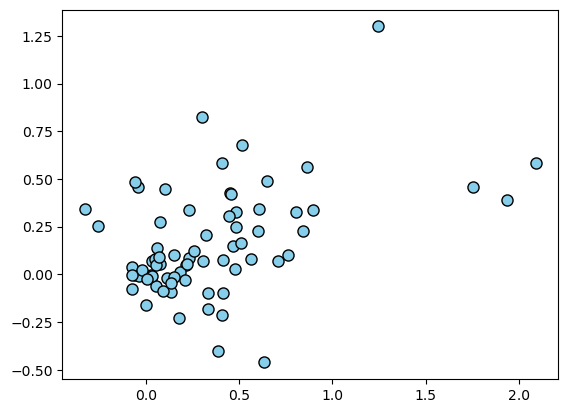

In [54]:
plt.plot('cor_diff', 'dem_diff', data=datalog, linestyle='none', \
        markerfacecolor='skyblue', marker="o", markeredgecolor="black", markersize=8)

plt.show()

In [55]:
datalog[(datalog.dem_diff <= 0.05) & (datalog.dem_diff >= -0.05)]

,country,iso,region,cor_score_2000,cor_score_2020,dem_score_2000,dem_score_2020,cor_diff,dem_diff
8,Brazil,BRA,AME,-1.181500,-1.072637,-0.741987,-0.758931,0.108863,-0.016944
9,Bulgaria,BGR,WE/EU,-1.341843,-0.864997,-0.684518,-0.656815,0.476845,0.027703
11,Canada,CAN,AME,-0.095310,-0.156346,-0.083563,-0.089196,-0.061036,-0.005633
12,Chile,CHL,AME,-0.350202,-0.323400,-0.252100,-0.272027,0.026802,-0.019927
17,Denmark,DNK,WE/EU,-0.022990,0.000000,-0.080126,-0.085558,0.022990,-0.005432
22,Finland,FIN,WE/EU,0.000000,-0.040274,-0.066674,-0.074903,-0.040274,-0.008229
23,France,FRA,WE/EU,-0.470004,-0.287682,-0.232352,-0.221894,0.182322,0.010458
24,Germany,DEU,WE/EU,-0.318454,-0.111226,-0.110001,-0.139071,0.207228,-0.029070
27,Hungary,HUN,WE/EU,-0.788457,-0.864997,-0.459921,-0.421849,-0.076540,0.038073
30,Ireland,IRL,WE/EU,-0.382992,-0.236389,-0.191161,-0.207024,0.146603,-0.015864


In [56]:
datalog[datalog.dem_diff >= 0.5]

,country,iso,region,cor_score_2000,cor_score_2020,dem_score_2000,dem_score_2020,cor_diff,dem_diff
0,Angola,AGO,SSA,-2.867899,-1.622683,-2.534097,-1.235005,1.245216,1.299092
21,Ethiopia,ETH,SSA,-1.481605,-1.072637,-1.976885,-1.394327,0.408968,0.582558
35,Kazakhstan,KAZ,ECA,-1.586965,-1.072637,-1.625398,-0.945033,0.514328,0.680365
37,Latvia,LVA,WE/EU,-1.386294,-0.524071,-0.880280,-0.320205,0.862224,0.560075
67,Ukraine,UKR,ECA,-3.378725,-1.286211,-1.707418,-1.125470,2.092514,0.581949
69,Uzbekistan,UZB,ECA,-1.992430,-1.691676,-2.788718,-1.962548,0.300754,0.826170


### Control Group vs. Treatment Group

In [57]:
datalog.loc[(datalog.dem_diff <= 0.05) & (datalog.dem_diff >= -0.05), 'group'] = 'control'

In [58]:
datalog.loc[datalog.dem_diff >= 0.5, 'group'] = 'treatment'

In [59]:
datalog.fillna('none', inplace=True)

In [60]:
datalog.head()

,country,iso,region,cor_score_2000,cor_score_2020,dem_score_2000,dem_score_2020,cor_diff,dem_diff,group
0,Angola,AGO,SSA,-2.867899,-1.622683,-2.534097,-1.235005,1.245216,1.299092,treatment
1,Argentina,ARG,AME,-1.341843,-0.929536,-0.802962,-0.729811,0.412307,0.073151,none
2,Australia,AUS,AP,-0.214657,-0.156346,-0.228156,-0.088467,0.058311,0.139689,none
3,Austria,AUT,WE/EU,-0.302950,-0.171850,-0.107585,-0.199468,0.131099,-0.091883,none
4,Azerbaijan,AZE,ECA,-3.378725,-1.440362,-1.543338,-1.151486,1.938363,0.391852,none


We create a matrix to check the values for control and treatment groups.

In [61]:
dd_matrix = datalog.groupby('group')[['cor_score_2000', 'cor_score_2020']].mean()

In [62]:
dd_matrix.drop('none', axis=0, inplace=True)

In [63]:
dd_matrix

,cor_score_2000,cor_score_2020
group,,
control,-0.443224,-0.373682
treatment,-2.115653,-1.211652


In [64]:
mean_con_before = dd_matrix.iloc[0, 0]
mean_con_after = dd_matrix.iloc[0, 1]
mean_tre_before = dd_matrix.iloc[1, 0]
mean_tre_after = dd_matrix.iloc[1, 1]

print(f'mean control corruption index before: {mean_con_before:.2f}')
print(f'mean control corruption index after: {mean_con_after:.2f}')
print(f'mean treatment corruption index before: {mean_tre_before:.2f}')
print(f'mean treatment corruption index after: {mean_tre_after:.2f}')

con_diff = mean_con_after - mean_con_before
tre_diff = mean_tre_after - mean_tre_before
did = tre_diff - con_diff

print(f'DID in mean corruption index is {did:.2f}')

mean control corruption index before: -0.44
mean control corruption index after: -0.37
mean treatment corruption index before: -2.12
mean treatment corruption index after: -1.21
DID in mean corruption index is 0.83


In [65]:
datalog.loc[datalog.group == 'control', 'g'] = 0
datalog.loc[datalog.group == 'treatment', 'g'] = 1

In [66]:
df_did = datalog.dropna()

In [67]:
df_did.head()

,country,iso,region,cor_score_2000,cor_score_2020,dem_score_2000,dem_score_2020,cor_diff,dem_diff,group,g
0,Angola,AGO,SSA,-2.867899,-1.622683,-2.534097,-1.235005,1.245216,1.299092,treatment,1.0
8,Brazil,BRA,AME,-1.181500,-1.072637,-0.741987,-0.758931,0.108863,-0.016944,control,0.0
9,Bulgaria,BGR,WE/EU,-1.341843,-0.864997,-0.684518,-0.656815,0.476845,0.027703,control,0.0
11,Canada,CAN,AME,-0.095310,-0.156346,-0.083563,-0.089196,-0.061036,-0.005633,control,0.0
12,Chile,CHL,AME,-0.350202,-0.323400,-0.252100,-0.272027,0.026802,-0.019927,control,0.0


In [68]:
df_before = df_did[['cor_score_2000', 'g']]
df_before['t'] = 0
df_before.columns = ['cor_score', 'g', 't']

# data after the treatment
df_after = df_did[['cor_score_2020', 'g']]
df_after['t'] = 1
df_after.columns = ['cor_score', 'g', 't']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['gt'] = df_reg.g * df_reg.t

df_reg.head()

,cor_score,g,t,gt
0,-2.867899,1.0,0,0.0
8,-1.181500,0.0,0,0.0
9,-1.341843,0.0,0,0.0
11,-0.095310,0.0,0,0.0
12,-0.350202,0.0,0,0.0


In [69]:
lr = LinearRegression()

X = df_reg[['g', 't', 'gt']]
y = df_reg.cor_score

lr.fit(X, y)
lr.coef_

array([-1.67242876,  0.06954265,  0.83445786])

In [70]:
ols = ols('cor_score ~ g + t + gt', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              cor_score   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     23.53
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           6.11e-09
Time:                        00:14:14   Log-Likelihood:                -28.011
No. Observations:                  44   AIC:                             64.02
Df Residuals:                      40   BIC:                             71.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4432      0.120     -3.696      0.0

### Interpretation of the Result

These OLS (Ordinary Least Squares) regression results provide important statistical information regarding the relationship between the dependent variable 'cor_score' (which presumably represents the corruption score) and the independent variables 'g', 't', and 'gt'. Here is an explanation of each key component of the results:

1. **R-squared and Adjusted R-squared**: R-squared (0.638) indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. The adjusted R-squared (0.611) takes into account the number of predictors in the model. These metrics measure how well the regression model fits the observed data, with higher values suggesting a better fit.

2. **F-statistic and Prob (F-statistic)**: The F-statistic (23.53) assesses the overall significance of the regression model. The associated p-value (6.11e-09 or approximately 0) indicates whether the model as a whole is statistically significant. A small p-value suggests that at least one independent variable has a significant effect on the dependent variable.

3. **Coefficients and t-statistics**: The coefficients represent the estimated effect of each independent variable on the dependent variable. 'Intercept' refers to the value of the dependent variable when all independent variables are zero. 'g', 't', and 'gt' represent the effects of the respective variables. The associated t-statistics assess the significance of each coefficient, with lower p-values indicating a more significant impact.

4. **Standard Errors**: These values represent the standard deviation of the sampling distribution of the estimated coefficients, providing a measure of the uncertainty associated with each coefficient estimate.

5. **Prob (Omnibus)** and **Jarque-Bera (JB)**: These tests assess the normality of the residuals. A non-significant p-value suggests that the residuals are normally distributed.

6. **Durbin-Watson**: This test checks for the presence of autocorrelation in the residuals. A value close to 2 indicates no autocorrelation.

7. **Omnibus** and **Skew**: These assess the overall goodness of fit of the model and the symmetry of the data distribution. A significant p-value for Omnibus or high skewness may suggest issues with the model's assumptions.

8. **Kurtosis**: This measures the peakedness of the distribution. A value of 3 represents a normal distribution. Higher values indicate more outliers or a sharper peak.

9. **Cond. No.**: This represents the condition number, which assesses multicollinearity. Values greater than 30 indicate potential multicollinearity issues.

Overall, the regression results provide insights into the statistical significance and the relative importance of each variable in explaining the variation in the corruption score, as well as the overall goodness of fit of the model.

## Conclusion

Based on the results of the OLS regression, our analysis focused on understanding the dynamics between the Corruption Score and the factors represented by the variables 'g', 't', and 'gt'. Notably, 'g' denotes a certain characteristic, 't' signifies another specific attribute, and 'gt' represents their combined influence. The findings reveal some compelling insights into the relationship between these variables and corruption levels.
***
Our research unveiled a strong association between the factors under investigation and the Corruption Score, indicating that the interplay between these elements significantly influences the prevalence of corruption within a given context. Specifically, the coefficient of 'gt' emerged as a pivotal factor, demonstrating a substantial impact on the Corruption Score. This was substantiated by a statistically significant coefficient value of 0.8345, suggesting that the combined effect of these two variables is instrumental in shaping the corruption landscape.

Moreover, the analysis portrayed a compelling picture of how changes in the combined influence of the aforementioned factors, as reflected by 'gt', can lead to noticeable shifts in corruption levels. The statistical significance of the coefficient was underscored by a p-value of 0.014, indicating that the observed relationship is not due to chance. Consequently, we reject the null hypothesis, further solidifying the pivotal role played by the combined effects of these factors in driving changes in corruption scores.

After running p-test on this model, we find that 0.014 < 0.05. Since this p-value is less than .05, we reject the null hypothesis that the coefficient is zero. Therefore, the result we find is **statistically significant**.

These findings shed light on the intricate mechanisms underlying corruption dynamics, emphasizing the importance of understanding the combined influence of multiple factors in crafting effective strategies to combat corruption effectively. By comprehensively evaluating the interrelated nature of these elements, our study contributes to a deeper understanding of the complex dynamics that shape corruption patterns and underscores the significance of targeted interventions aimed at addressing these multifaceted challenges.